In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import binary_dilation, zoom

In [32]:
image_path = "screenshot.png"  # Replace with the path to your image
image = cv2.imread(image_path)

# Set the center and radius of the circle (you can adjust these values)
center = (image.shape[1] // 2, image.shape[0] // 2)  # Use the center of the image
radius = min(image.shape[0], image.shape[1]) // 4  # Use a quarter of the smallest dimension


In [33]:
image.shape

(1007, 1918, 3)

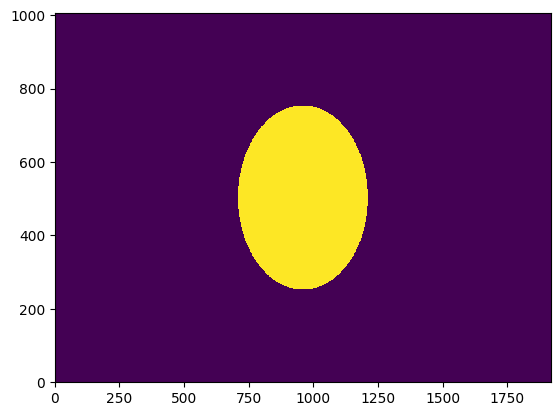

In [79]:
mask = np.zeros(image.shape, dtype=np.uint8)

# Draw the circle in white on the mask
cv2.circle(mask, center, radius, (1), -1)

mask[:,:,1] = mask[:,:,2] = mask[:,:,0]
plt.pcolormesh(mask[:,:,1])

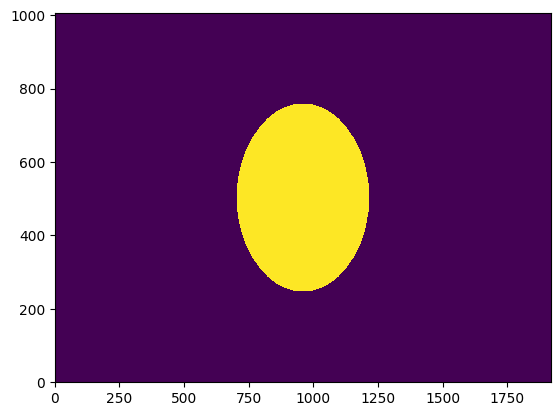

In [80]:
mask_dilated = binary_dilation(mask, iterations=5)
plt.pcolormesh(mask_dilated[:,:,2])

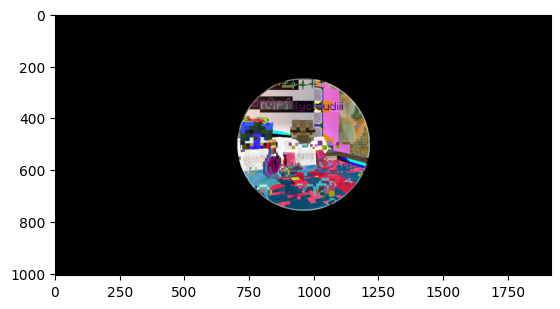

In [81]:
masked_img = image * mask_dilated

plt.imshow(masked_img)

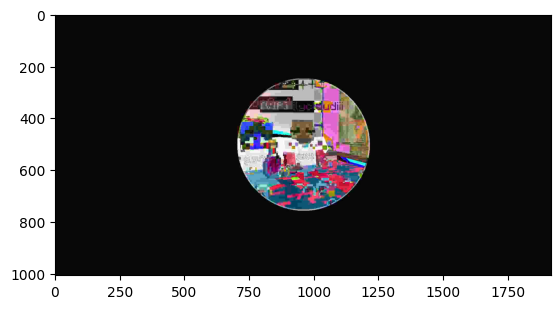

In [82]:
# Compress the masked image using JPEG compression
_, compressed_image = cv2.imencode(".jpg", masked_img, [int(cv2.IMWRITE_JPEG_QUALITY), 5])

# Decode the compressed image
compressed_image = cv2.imdecode(compressed_image, cv2.IMREAD_COLOR)

plt.imshow(compressed_image)

1.0

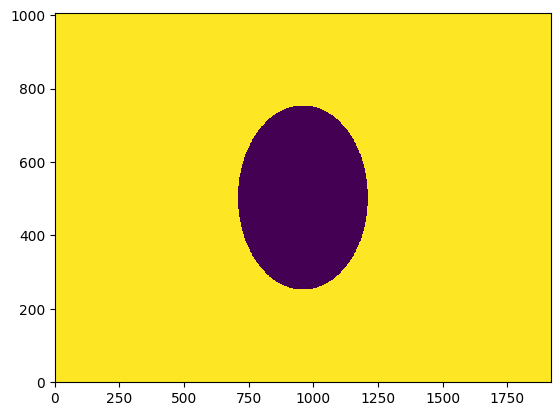

In [85]:
mask_inverted = mask.__invert__()/255
plt.pcolormesh(mask_inverted[:,:,2])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


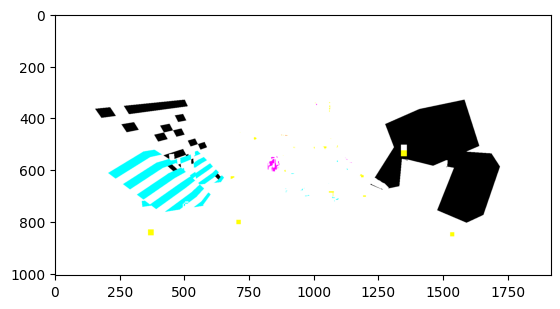

In [86]:
new_image = image * mask_inverted + compressed_image * mask_dilated

plt.imshow(new_image)


In [59]:
cv2.imwrite("D:\\temp\\new_image.png", new_image)

True

In [87]:
mask_inverted

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

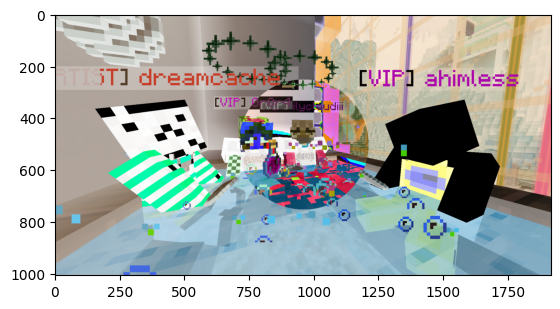

In [88]:
tmp = image

for i in range(3):
    tmp[:,:,i] = tmp[:,:,i] * mask_inverted[:,:,i]

plt.imshow(tmp)